In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/home/kasat/datasets/Social_N.xlsx")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = data[['Age','EstimatedSalary']]
Y = data.iloc[:,-1]
b = int(len(X) * 0.7)

scalar = StandardScaler() 
X = scalar.fit_transform(X)
x_train = X[:b]
x_test = X[b:]
y_train = Y[:b]
y_test = Y[b:]

In [4]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [5]:
linear_clf = SVC(kernel = 'linear')
rbf_clf = SVC(kernel = 'rbf')

In [6]:
linear_clf.fit(x_train,y_train)
rbf_clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
def plot(x_train, y_train, clf, plt):
    X_set, y_set =x_train, y_train
    X_grid_0 = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,step = 0.01)
    X_grid_1 = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,step = 0.01)
    X1 , X2 = np.meshgrid(X_grid_0, X_grid_1)

    X3 = clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)
    plt.contourf(X1, X2, X3, alpha = 0.50, cmap = ListedColormap(("yellow","cyan")))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(("yellow", "cyan"))(i), label = j,edgecolors = "Black")
    plt.legend()
    plt.show()

In [8]:
y_pred = linear_clf.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix: ')
for i in cm:
    print(i)
print('\nAccuracy :', accuracy_score(y_pred, y_test))

Confusion matrix: 
[75  7]
[ 8 30]

Accuracy : 0.875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


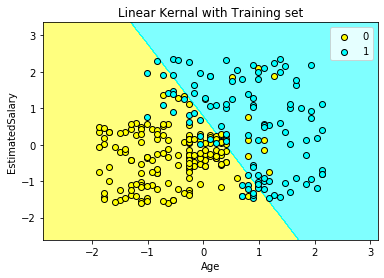

In [9]:
plt.title("Linear Kernal with Training set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_train, y_train, linear_clf, plt)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


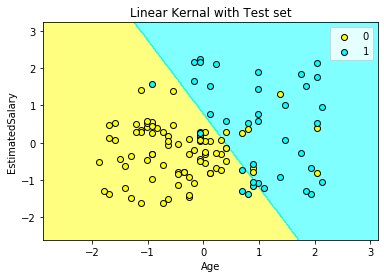

In [10]:
plt.title("Linear Kernal with Test set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_test, y_test, linear_clf, plt)